In [1]:
#https://www.python-course.eu/expectation_maximization_and_gaussian_mixture_models.php

In [ ]:
pip install markov_clustering

In [ ]:
f=open('msnbc990928.seq','r')
l=f.readlines()

import numpy as np

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import markov_clustering as mcl#(have to install)

nusers=100
e=l[7:nusers]

page_categories=170
mat=[[0 for i in range(page_categories)] for j in range(len(e))]
#pages=e[i].split()
for i in range(len(e)):
  pages=e[i].split()
  for j in pages:
    mat[i][int(j)-1]=mat[i][int(j)-1]+1


m=np.matrix(mat)
m.shape

adj_matrix=np.dot(m,m.T)




In [ ]:
res = mcl.run_mcl(np.matrix(adj_matrix))
clusters = mcl.get_clusters(res)

In [ ]:
#https://www.youtube.com/watch?v=FpOIbhOmGUs
import random
id=range(nusers)
nodes=range(nusers)
res = [random.randrange(15, 60, 1) for i in range(nusers)]

df=pd.DataFrame(zip(id,nodes,res),columns=['Id','Label','Age'])
df['Cluster']=0
df['Cluster']=0
for i in range(len(df)):
  for j in range(len(clusters)):
    if i in clusters[j]:
      df['Cluster'][i]=j
      
df.to_csv('node.csv',index=False)

l=[]
for i in range(len(adj_matrix)):
  for j in range(len(adj_matrix)):
    if adj_matrix[i,j]>0:
      l.append([i,j,'Directed',adj_matrix[i,j]])

l=l[0:200]
edge=pd.DataFrame(l,columns=['Source','Target','Type','Weight'])
edge.to_csv('edge.csv',index=False)

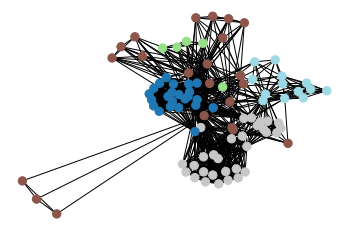

<Figure size 432x288 with 0 Axes>

In [ ]:

#user user matrix
#nx.draw_networkx(G)
#Clustering

res = mcl.run_mcl(np.matrix(adj_matrix))
clusters = mcl.get_clusters(res)
mcl.drawing.draw_graph(adj_matrix, clusters, edge_color="black",node_size=70,with_labels=False)
plt.savefig('one.pdf')


In [ ]:
https://python-louvain.readthedocs.io/en/latest/api.html

In [ ]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
G = nx.from_numpy_matrix(adj_matrix)

# compute the best partition
partition = community_louvain.best_partition(G)

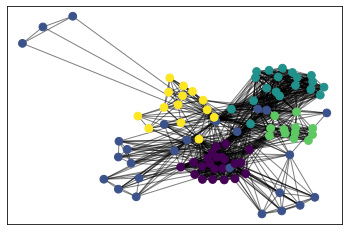

In [ ]:
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=60, 
                      cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)

from matplotlib import pyplot as plt

plt.savefig('two.png')
#plt.savefig('foo.pdf')

In [ ]:
https://www.analyticsvidhya.com/blog/2020/04/community-detection-graphs-networks/

In [ ]:
res = [random.randrange(1, 5, 1) for i in range(93)]


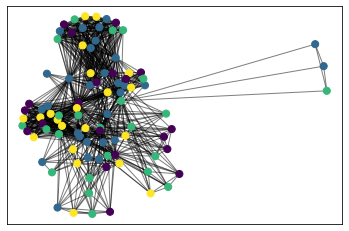

In [ ]:
pos = nx.spring_layout(G)
cmap = cm.get_cmap('viridis', 4)
nx.draw_networkx_nodes(G, pos,cmap=cmap, node_color=res,node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

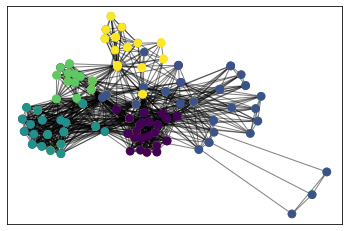

In [ ]:
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=60, 
                      cmap=cmap, node_color=res)
nx.draw_networkx_edges(G, pos, alpha=0.5)

from matplotlib import pyplot as plt

plt.savefig('foo.png')

#plt.savefig('foo.pdf')


nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=60, 
                      cmap=cmap, node_color=list(partition.values()))
plt.show()